In [115]:
# RQ3 : distribution of trip's duration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import dask.dataframe as dd
import time
import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
first_data  = dd.read_csv("D:\ADM\HW-1\Open data NYC Yellow cab\yellow_tripdata_2018-01.csv")
second_data = dd.read_csv("D:\ADM\HW-1\Open data NYC Yellow cab\yellow_tripdata_2018-02.csv")
third_data= dd.read_csv("D:\ADM\HW-1\Open data NYC Yellow cab\yellow_tripdata_2018-03.csv")
fourth_data= dd.read_csv("D:\ADM\HW-1\Open data NYC Yellow cab\yellow_tripdata_2018-04.csv")
fifth_data= dd.read_csv("D:\ADM\HW-1\Open data NYC Yellow cab\yellow_tripdata_2018-05.csv")
sixth_data= dd.read_csv("D:\ADM\HW-1\Open data NYC Yellow cab\yellow_tripdata_2018-06.csv")

In [221]:
second_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-02-01 00:01:58,2018-02-01 00:04:03,1,0.0,1,N,145,145,2,3.5,0.5,0.5,0.0,0.0,0.3,4.8
1,1,2018-02-01 00:56:48,2018-02-01 00:57:42,1,2.9,1,N,145,145,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8
2,1,2018-02-01 00:04:42,2018-02-01 00:19:32,1,5.8,1,N,236,119,2,18.5,0.5,0.5,0.0,0.0,0.3,19.8
3,1,2018-02-01 00:38:10,2018-02-01 00:40:16,1,0.3,1,N,82,82,2,3.5,0.5,0.5,0.0,0.0,0.3,4.8
4,1,2018-02-01 00:43:03,2018-02-01 00:59:26,2,2.6,1,N,82,7,1,13.0,0.5,0.5,1.0,0.0,0.3,15.3


In [118]:
def convert_to_unix_time(date):
    return time.mktime(datetime.datetime.strptime(date,"%Y-%m-%d %H:%M:%S").timetuple())

In [119]:
def time_checking(data_):
    time_of_year  = data_[["tpep_pickup_datetime","tpep_dropoff_datetime"]].compute()
    drop_off_time  = time_of_year.tpep_dropoff_datetime.values
    start_time     = time_of_year.tpep_pickup_datetime.values

    pickup_time = [convert_to_unix_time(i) for i in start_time]
    drop_time  = [convert_to_unix_time(i) for i in drop_off_time]

    time_of_year["start"] = pickup_time
    time_of_year["End"]   = drop_time

    time_of_year.drop(["tpep_pickup_datetime","tpep_dropoff_datetime"],axis=1,inplace=True)
    return time_of_year

In [120]:
def find_duration(d_duration):
    d_duration["duration"] = d_duration["End"] - d_duration["start"]
    return d_duration
    

In [121]:
def plot_graph(d_dura):
    #lets start creating the plots 
    plt.figure(figsize=(12,10))
    sb.distplot(d_dura["duration"],bins=10)
    plt.grid()
    plt.ylabel("Probability")
    plt.title("Histogram of Duration which is (EndTrip - StartTrip)")
    plt.show()


In [128]:
fifth_duration_ofNYC[fifth_duration_ofNYC["duration"] < 0]


,start,End,duration
335948,1.525239e+09,8.850665e+08,-640172992.0
497190,1.525872e+09,1.525545e+09,-327318.0
94458,1.525958e+09,1.524838e+09,-1119656.0
425562,1.526649e+09,1.503927e+09,-22722033.0
267043,1.527513e+09,1.527041e+09,-472324.0
527761,1.527608e+09,1.527607e+09,-638.0


In [122]:
first_duration_ofNYC = time_checking(first_data)
second_duration_ofNYC = time_checking(second_data)
third_duration_ofNYC = time_checking(third_data)
fourth_duration_ofNYC = time_checking(fourth_data)
fifth_duration_ofNYC = time_checking(fifth_data)
sixth_duration_ofNYC = time_checking(sixth_data)

first_duration_ofNYC = find_duration(first_duration_ofNYC)
second_duration_ofNYC = find_duration(second_duration_ofNYC)
third_duration_ofNYC = find_duration(third_duration_ofNYC)
fourth_duration_ofNYC = find_duration(fourth_duration_ofNYC)
fifth_duration_ofNYC = find_duration(fifth_duration_ofNYC)
sixth_duration_ofNYC = find_duration(sixth_duration_ofNYC)




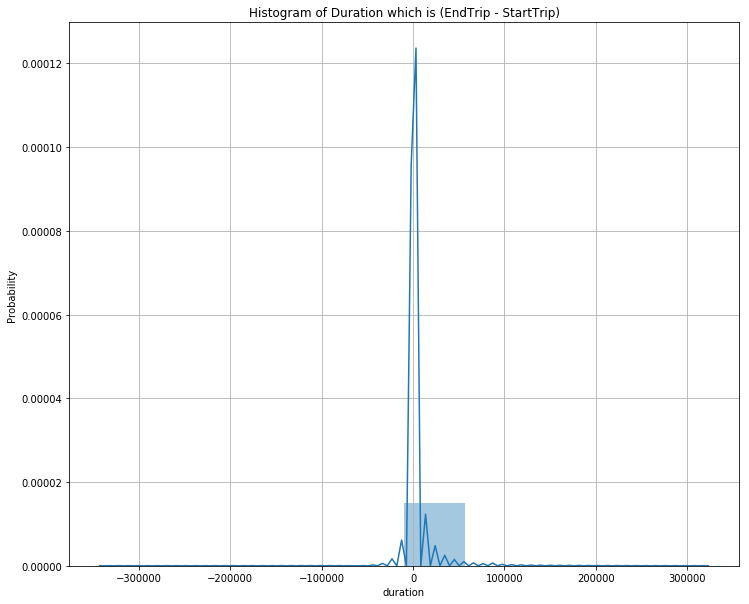

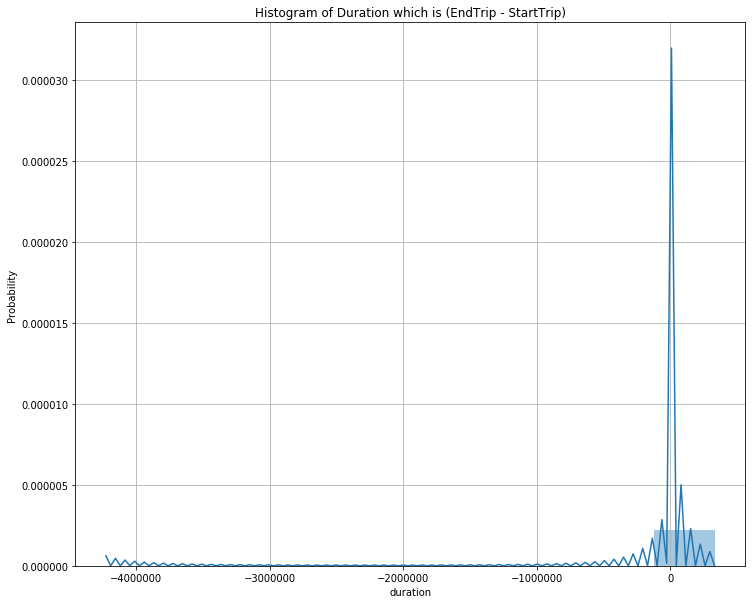

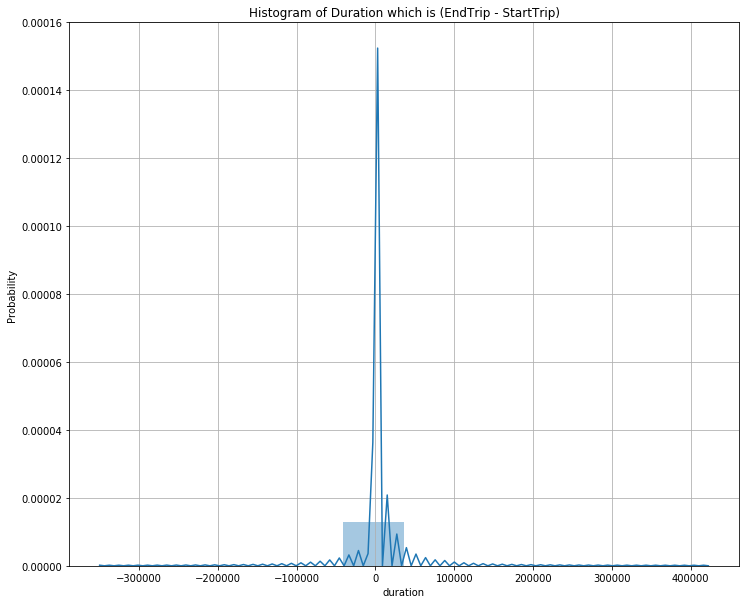

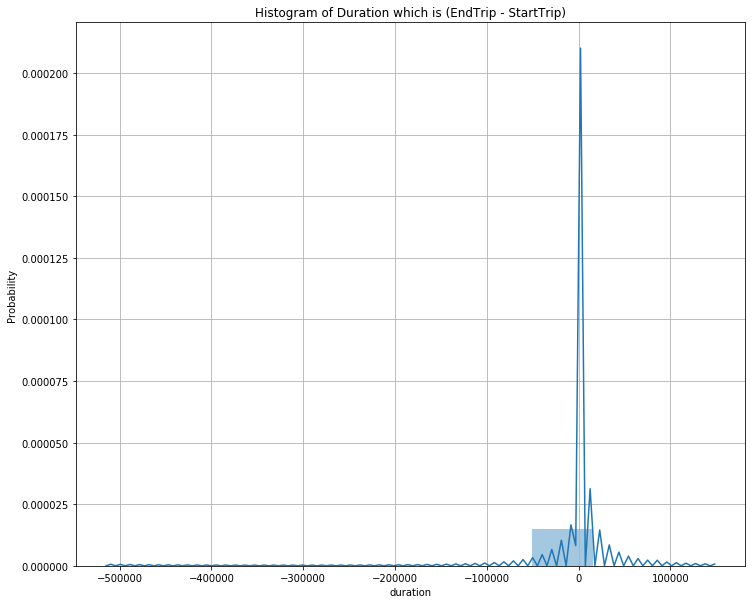

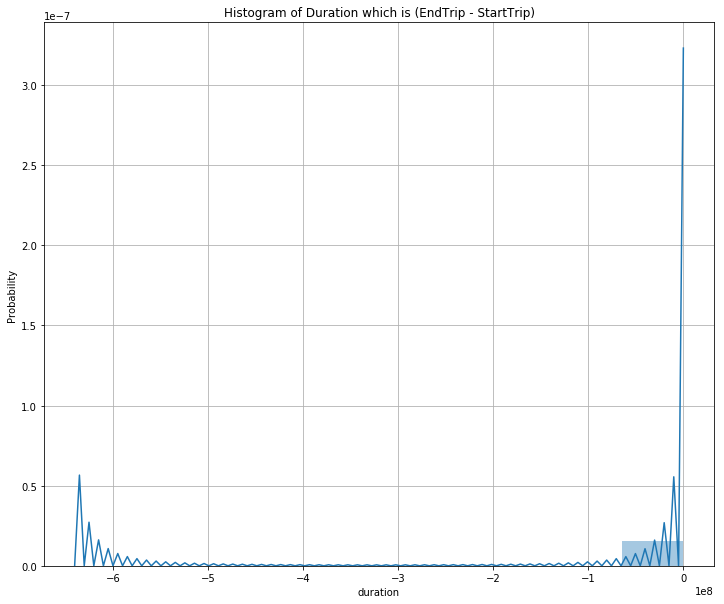

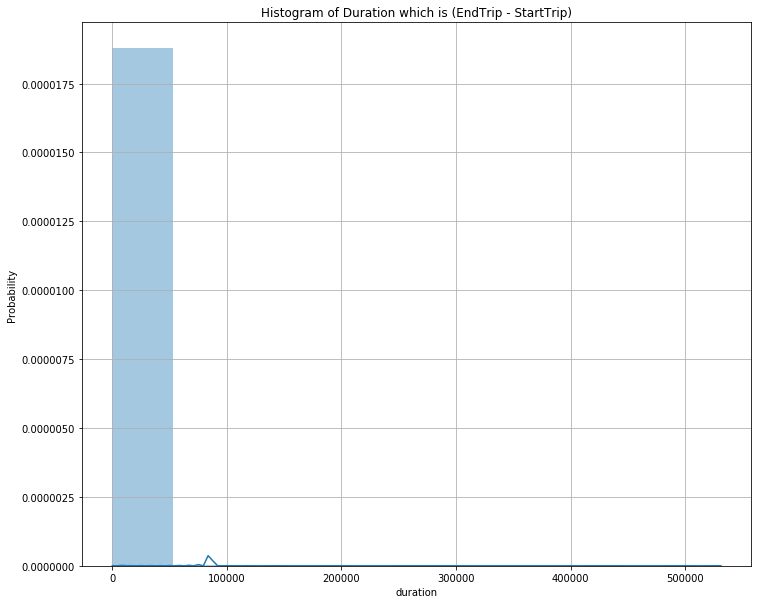

In [123]:
plot_graph(first_duration_ofNYC)
plot_graph(second_duration_ofNYC)
plot_graph(third_duration_ofNYC)
plot_graph(fourth_duration_ofNYC)
plot_graph(fifth_duration_ofNYC)
plot_graph(sixth_duration_ofNYC)

<h1> Analysis of the Histogram </h1>
       <b>Plot As per Graph One :</b>
           <p> As we can see the graph is highly skewed and duration is not normally distributed and most of the duration in                    this graph is zero </p>

In [6]:

look_up_table  = dd.read_csv("D:/ADM/HW-1/Open data NYC Yellow cab/taxi_zone_lookup.csv")
look_up_table = look_up_table[["LocationID","Borough"]].compute()
look_up_table.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [4]:
new_df=  first_data[["tpep_pickup_datetime","tpep_dropoff_datetime","trip_distance","fare_amount","PULocationID","DOLocationID"]].compute()

In [7]:
borough_data = pd.merge(new_df,look_up_table,how='left',left_on=['PULocationID'],right_on=['LocationID'])
borough_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,PULocationID,DOLocationID,LocationID,Borough
0,2018-01-01 00:21:05,2018-01-01 00:24:23,0.5,4.5,41,24,41,Manhattan
1,2018-01-01 00:44:55,2018-01-01 01:03:05,2.7,14.0,239,140,239,Manhattan
2,2018-01-01 00:08:26,2018-01-01 00:14:21,0.8,6.0,262,141,262,Manhattan
3,2018-01-01 00:20:22,2018-01-01 00:52:51,10.2,33.5,140,257,140,Manhattan
4,2018-01-01 00:09:18,2018-01-01 00:27:06,2.5,12.5,246,239,246,Manhattan


In [ ]:
borough_data = borough_data[borough_data["trip_distance"]!= 0]
borough_data["price_per_mile"] = (borough_data["trip_distance"]/0.62137)/borough_data["fare_amount"]
borough_data = borough_data[borough_data['price_per_mile'] != np.inf]
borough_data.head()

In [9]:
group_data = borough_data.groupby("Borough")
mean_distribution_by_city  = group_data['price_per_mile'].mean()
std_distribution_by_city =  group_data['price_per_mile'].std()
name =  pd.Series(mean_distribution_by_city.keys())
mean =  pd.Series(mean_distribution_by_city.values)
std  =  pd.Series(std_distribution_by_city.values)

mean_std_dataFrameByBorough  = pd.concat([name,mean,std],axis=1)
mean_std_dataFrameByBorough["mean"] = mean_std_dataFrameByBorough[0]
mean_std_dataFrameByBorough["std"] = mean_std_dataFrameByBorough[1]

mean_std_dataFrameByBorough.drop([0,1],axis=1,inplace=True)
mean_std_dataFrameByBorough.head()

,Borough,mean,std
0,Bronx,3.011151,100.178394
1,Brooklyn,0.486192,19.652298
2,EWR,17.206663,214.124068
3,Manhattan,0.318688,8.842047
4,Queens,0.950454,111.432324


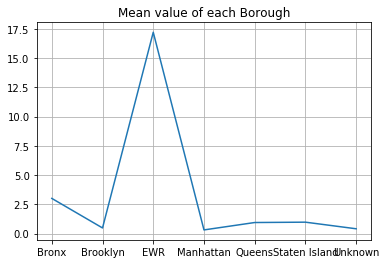

In [10]:
#lets plot the mean and std of each borough 
plt.plot(mean_std_dataFrameByBorough['Borough'],mean_std_dataFrameByBorough['mean'])
plt.grid()
plt.title("Mean value of each Borough")
plt.show()

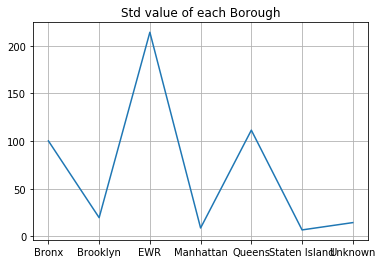

In [11]:
#lets plot the mean and std of each borough 
plt.plot(mean_std_dataFrameByBorough['Borough'],mean_std_dataFrameByBorough['std'])
plt.grid()
plt.title("Std value of each Borough")
plt.show()

In [12]:
# T -TEST
import scipy
def tTest(mode1,mode2):
    one_sample_result  = scipy.stats.ttest_ind(mode1,mode2)
    return one_sample_result

In [13]:
k = borough_data.Borough.value_counts()
t_test_result = []
list_borough = list(k.keys())
for i in list_borough:
    for j in list_borough:
        if i  !=j:
            result = tTest(borough_data[borough_data['Borough']==i]['price_per_mile'],borough_data[borough_data['Borough']==j]['price_per_mile'])
            t_test_result.append({i+"->"+j:result})


In [14]:
t_test_result

[{'Manhattan->Queens': Ttest_indResult(statistic=-15.247363215645203, pvalue=1.716935737979137e-52)},
 {'Manhattan->Unknown': Ttest_indResult(statistic=-4.126664508241281, pvalue=3.680664182819006e-05)},
 {'Manhattan->Brooklyn': Ttest_indResult(statistic=-5.769902306186743, pvalue=7.932040020226365e-09)},
 {'Manhattan->Bronx': Ttest_indResult(statistic=-23.61757175093357, pvalue=2.5686511712515994e-123)},
 {'Manhattan->EWR': Ttest_indResult(statistic=-24.676774476511515, pvalue=1.9217471500995128e-134)},
 {'Manhattan->Staten Island': Ttest_indResult(statistic=-0.7780724895570958, pvalue=0.43652630300837125)},
 {'Queens->Manhattan': Ttest_indResult(statistic=15.247363215645203, pvalue=1.716935737979137e-52)},
 {'Queens->Unknown': Ttest_indResult(statistic=1.846049121893206, pvalue=0.06488551847165074)},
 {'Queens->Brooklyn': Ttest_indResult(statistic=1.3033954912378998, pvalue=0.1924402643665022)},
 {'Queens->Bronx': Ttest_indResult(statistic=-1.50179333766123, pvalue=0.1331510950040378